In [12]:
import matplotlib.pyplot as plt
import numpy as np

import json
from pandas.io.json import json_normalize
import matplotlib


def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = plt.Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = plt.Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = plt.Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = matplotlib.patches.ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = plt.Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = plt.Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = matplotlib.patches.Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = matplotlib.patches.Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)


# HEATMAP

In [13]:
def heatmap(lstx, lsty,name):
    import seaborn as sns
    fig=plt.figure() #set up the figures
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax) #overlay our different objects on the pitch
    plt.ylim(-2, 82)
    plt.xlim(-2, 122)
    plt.axis('on')


    fig.set_size_inches(7, 5)

    x_coord = lstx
    y_coord = lsty

    #shades: give us the heat map we desire
    # n_levels: draw more lines, the larger n, the more blurry it looks
    sns.kdeplot(x_coord, y_coord, shade = "True", color = "blue", n_levels = 10, label = name)
    plt.legend()
    plt.show()


In [14]:
import pandas as pd 
with open('events_Spain.json') as json_data: 
    data_dict2 = json.load(json_data,encoding = "ISO-8859-1")

dfevents = pd.DataFrame.from_dict(data_dict2, orient='columns')

with open('matches_Spain.json') as json_data:
    data_dict3 = json.load(json_data,encoding = "ISO-8859-1")    

dfmatch = pd.DataFrame.from_dict(data_dict3, orient='columns')

In [15]:
with open('players.json') as json_data:
    data_dict4 = json.load(json_data,encoding = "ISO-8859-1")    

dfplayers = pd.DataFrame.from_dict(data_dict4, orient='columns')
with open('teams.json') as json_data:
    data_dict5 = json.load(json_data,encoding = "ISO-8859-1")    

dfteams = pd.DataFrame.from_dict(data_dict5, orient='columns')

In [16]:
# we compute the same algorithm than in the first part
df2 = dfmatch.label 
liste= []
for row in df2:
    a = row.replace('-',',')
    a = a.split(',')
    liste.append(a)
gagnant = []
perdant = []
draw = []
equipeA= []
equipeB= []
for k in liste:
    equipeA.append(k[0].strip())
    equipeB.append(k[1].strip())
    a = int(k[2])
    b = int(k[3])
    if a > b :
        gagnant.append(k[0].strip())
        perdant.append(k[1].strip())
        draw.append("NON")
    elif a < b :
        gagnant.append(k[1].strip())
        perdant.append(k[0].strip())
        draw.append("NON")
    else : 
        gagnant.append("NON")
        perdant.append("NON")
        draw.append("YES")
        
dfgagnant = pd.DataFrame(gagnant, columns = ['gagnant'])
dfperdant = pd.DataFrame(perdant, columns = ['perdant'])
dfeA = pd.DataFrame(equipeA, columns = ['EquipeA'])
dfeB = pd.DataFrame(equipeB, columns = ['EquipeB'])
dfnul = pd.DataFrame(draw, columns = ['Draw'])
dfResult = pd.concat([dfmatch,dfgagnant, dfperdant, dfnul,dfeA,dfeB], axis = 1)


In [17]:

def affich(name,clubA, clubB):
    lstx = []
    lsty = []
    matchid = (dfResult.loc[(dfResult['EquipeA'] == clubA) & (dfResult['EquipeB'] == clubB)]).wyId
    playerid = (dfplayers.loc[(dfplayers['shortName'] == name)]).wyId
    eventRonaldo = (dfevents.loc[(dfevents['playerId'] == int(playerid)) & (dfevents['matchId'] == int(matchid))])
    for index, row in eventRonaldo.iterrows():
        if (row.eventName == 'Duel') or (row.eventName == 'Offside') : # for the duel and the offside, we consider the whole tuple position
            elements = row.positions
            for element in elements:
                for key, values in element.items():
                        if key == 'y':
                            lsty.append(values*0.8)
                        elif key == 'x':
                            lstx.append(120-values*1.2)
        
        else : # for all the others event, we consider just the initial position of the event
            element = row.positions[0]
            for key, values in element.items():
                    if key == 'y':
                            lsty.append(values*0.8) # we multiply by 0.8 to adapt the value to the size of the field
                    elif key == 'x':
                            lstx.append(120-values*1.2) # we substract by 120 to reverse the x axis and we multiply by 1.2 to adapt the value to the size of the field

                    
    heatmap(lstx, lsty,name)
                    
            
            

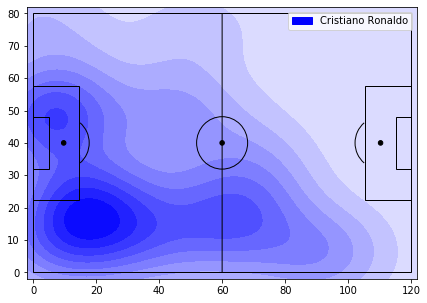

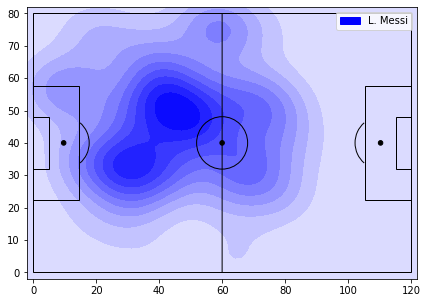

In [18]:

name = 'Cristiano Ronaldo'
affich(name,'Barcelona', 'Real Madrid')
name = 'L. Messi'
affich(name,'Barcelona', 'Real Madrid')


The two teams attack to the left side.
We see that Ronaldo attacks from the left side while Messi plays in the heart of the field
Ronaldo makes more defensive actions than Messi
 

# ARROWS + HEATMAP

In [19]:
def arrow(name,initposition,finalposition, lstx, lsty):
    import seaborn as sns
    fig=plt.figure() #set up the figures
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax) #overlay our different objects on the pitch
    plt.ylim(-2, 82)
    plt.xlim(-2, 122)
    plt.axis('on')


    fig.set_size_inches(7, 5)

    x_coord = lstx
    y_coord = lsty

    #shades: give us the heat map we desire
    # n_levels: draw more lines, the larger n, the more blurry it looks
    for k in range(len(initposition)):
        for key, values in initposition[k].items(): #we iterate over the dictionary to find the value of x and y. we do it for the initial position and the final position
            if key == 'y':
                inity = values
            elif key == 'x':
                initx = values
        for key, values in finalposition[k].items():
            if key == 'y':
                finaly = values
            elif key == 'x':
                finalx = values
    
        #then we plot the arrows
        ax.annotate("", xy = (120-1.2*finalx, 0.8*finaly), xycoords = 'data',xytext = (120-1.2*initx, 0.8*inity), textcoords = 'data',arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "black"))
    ##Plot the heatmap
    sns.kdeplot(x_coord, y_coord, shade = "True", color = "blue", n_levels = 10,label = name)
    plt.legend()


In [22]:
import pandas as pd 
with open('events_Italy.json') as json_data: 
    data_dict2 = json.load(json_data,encoding = "ISO-8859-1")

dfevents = pd.DataFrame.from_dict(data_dict2, orient='columns')
with open('matches_Italy.json') as json_data:
    data_dict3 = json.load(json_data,encoding = "ISO-8859-1")    

dfmatch = pd.DataFrame.from_dict(data_dict3, orient='columns')
df2 = dfmatch.label 
liste= []
for row in df2:
    a = row.replace('-',',')
    a = a.split(',')
    liste.append(a)
gagnant = []
perdant = []
draw = []
equipeA= []
equipeB= []
for k in liste:
    equipeA.append(k[0].strip())
    equipeB.append(k[1].strip())
    a = int(k[2])
    b = int(k[3])
    if a > b :
        gagnant.append(k[0].strip())
        perdant.append(k[1].strip())
        draw.append("NON")
    elif a < b :
        gagnant.append(k[1].strip())
        perdant.append(k[0].strip())
        draw.append("NON")
    else : 
        gagnant.append("NON")
        perdant.append("NON")
        draw.append("YES")
        
dfgagnant = pd.DataFrame(gagnant, columns = ['gagnant'])
dfperdant = pd.DataFrame(perdant, columns = ['perdant'])
dfeA = pd.DataFrame(equipeA, columns = ['EquipeA'])
dfeB = pd.DataFrame(equipeB, columns = ['EquipeB'])
dfnul = pd.DataFrame(draw, columns = ['Draw'])
dfResult = pd.concat([dfmatch,dfgagnant, dfperdant, dfnul,dfeA,dfeB], axis = 1)


In [23]:
def affich2(name,clubA, clubB):
    initposition = []
    finalposition = []
    lstxheatmap = []
    lstyheatmap = []
    matchid = (dfResult.loc[(dfResult['EquipeA'] == clubA) & (dfResult['EquipeB'] == clubB)]).wyId
    playerid = (dfplayers.loc[(dfplayers['shortName'] == name)]).wyId
    eventRonaldo = (dfevents.loc[(dfevents['playerId'] == int(playerid)) & (dfevents['matchId'] == int(matchid))])
    for index, row in eventRonaldo.iterrows():
        if (row.eventName == 'Pass') : # we choose just pass and free kick
            elements = row.positions
            initposition.append(elements[0])
            finalposition.append(elements[1])
            element = row.positions[0]
            for key, values in element.items():
                    if key == 'y':
                            lstyheatmap.append(values*0.8)
                    elif key == 'x':
                            lstxheatmap.append(120-values*1.2)
    arrow(name, initposition,finalposition,lstxheatmap,lstyheatmap)
    
                    

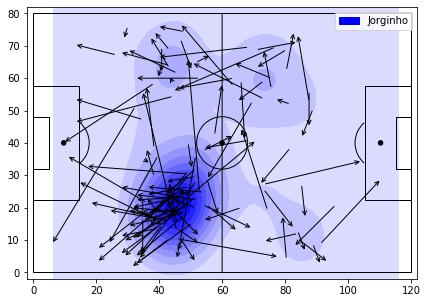

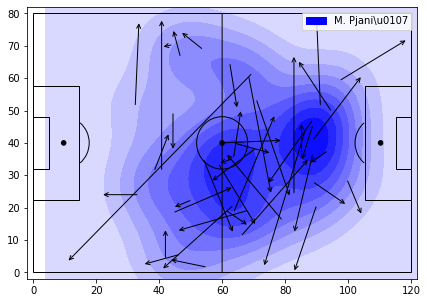

In [24]:
affich2('Jorginho', 'Juventus', 'Napoli')
affich2('M. Pjani\\u0107', 'Juventus', 'Napoli')


#Jorginho has made more forward passes than Pjanic.